# Adult Census Income

In [1]:
#import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the datset
data = pd.read_csv('C:/Users/saran/Downloads/adult.csv/adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
#checking the shape of dataset
data.shape

(32561, 15)

In [4]:
#checking the number of numerical and categorical features present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# observation

There are 9 categorical features present in the dataset and 6 numerical features(discrete and continuous). 

income feature is the target feature.

In [5]:
#see the feature names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#renaming the feature names
data.rename(columns={'education.num': 'education_num', 'marital.status':'marital_status',
                    'capital.gain':'capital_gain', 'capital.loss':'capital_loss',
                    'hours.per.week':'hours_per_week', 'native.country':'native_country'}, inplace=True)

In [7]:
#stripping the feature names
data.columns = [feature.strip() for feature in data.columns]

In [8]:
#splitting the categorical and numerical features
#categorical features 
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [9]:
#finding out the discrete feature present in the datset
discrete_feature = [feature for feature in data.columns if feature not in categorical_feature and data[feature].nunique()<20]
discrete_feature

['education_num']

In [10]:
#continuous features 
continuous_feature = [feature for feature in data.columns if feature not in discrete_feature+categorical_feature]
continuous_feature

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [11]:
#workclass feature contains '?' category , replacing with mode value
mode = data.workclass.mode()[0]
data.workclass.replace('?', mode, inplace=True)

In [12]:
#occupation feature contains '?' category, replacing with its mode value
mode1 = data.occupation.mode()[0]
data.occupation.replace('?', mode1, inplace=True)

In [13]:
#fixing the native country feature with mode 
mode2 = data.native_country.mode()[0]
data.native_country.replace('?', mode2, inplace=True)

In [14]:
#trimming all the categories present in the dataset
for feature in categorical_feature:
    data[feature] = data[feature].str.strip()

# Univariate Analysis

In [15]:
#importing probplot for drawing q-q plot
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


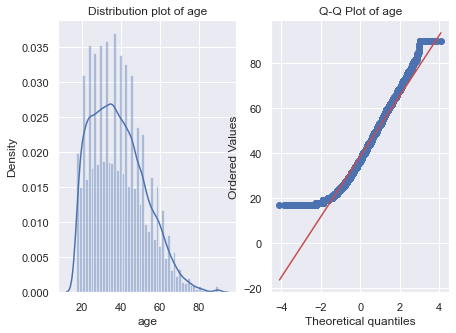

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


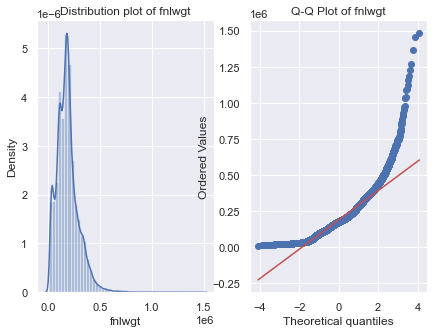

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


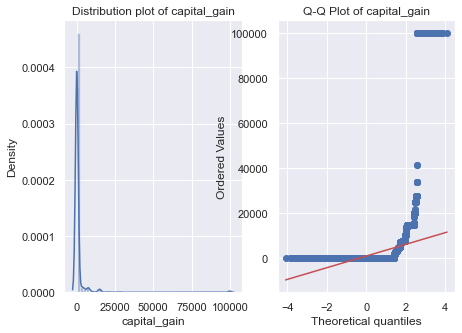

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


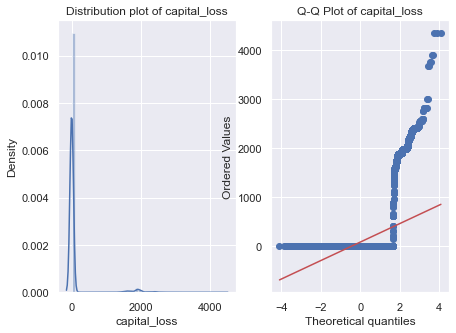

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


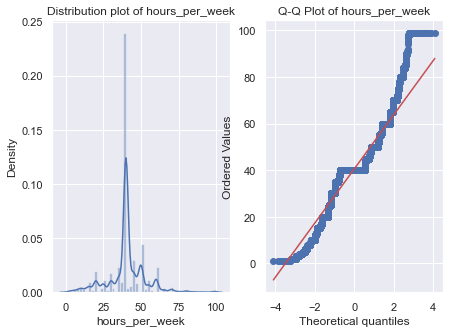

In [16]:
#checking the distribution of the continuous features
for feature in continuous_feature:
    sns.set_theme()
    plt.figure(figsize=(7,5))
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.title('Distribution plot of {}'. format(feature))
    plt.subplot(1,2,2)
    probplot(data[feature], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot of {}'.format(feature))
    plt.show()

# observation

1. Age and hours_per_week features are approximately normally distributed
2. features fnlwgt, capital_gain, capital_loss are rightly skewed (they might need log normal transformation)

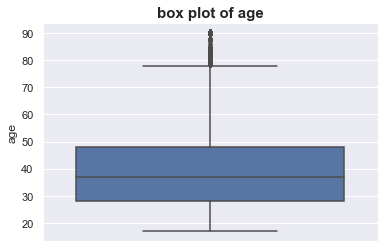

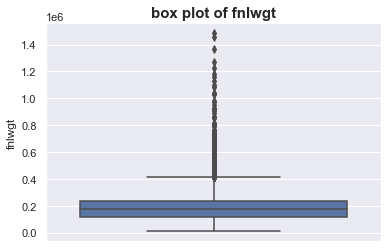

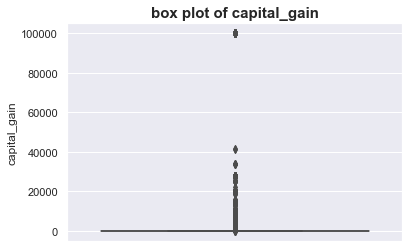

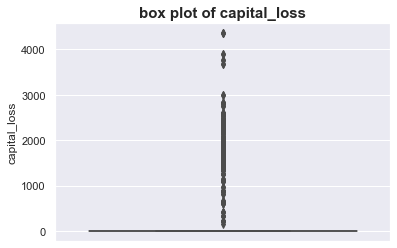

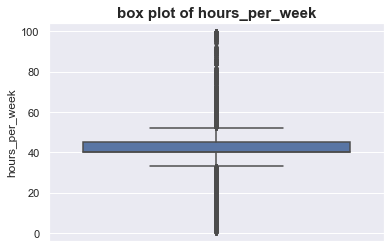

In [17]:
#checking the number of outliers present in the continuous features
for feature in continuous_feature:
    sns.set_theme()
    sns.boxplot(y=data[feature])
    plt.title('box plot of {}'.format(feature), fontsize=15, fontweight='bold')
    plt.show()

# observation 

1. hours_per_week has outliers present in both the sides
2. age, flnwgt, capital_gain, capital_loss have outliers present in the upper side
3. There are numerous outliers present in the flnwgt, capital_gain, capital_loss features

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of education_num')

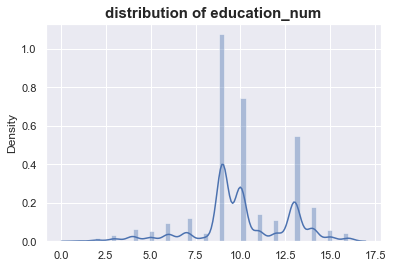

In [18]:
#see the distribution of the discrete feature
sns.distplot(data[discrete_feature])
plt.title('distribution of {}'.format('education_num'), fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'boxplot of eduacation_num')

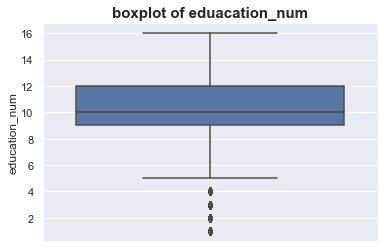

In [19]:
#boxplot of discrete feature
sns.boxplot(y = data['education_num'])
plt.title('boxplot of {}'.format('eduacation_num'), fontsize=15, fontweight='bold')

# observation

There are outliers present in the lower side of the feature.

# categorical feature analysis 

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


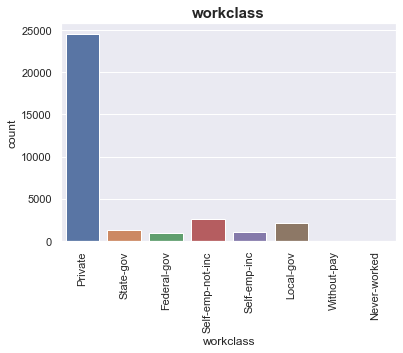

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


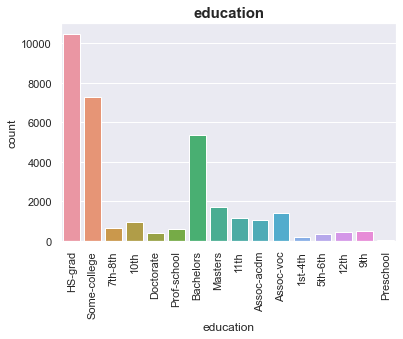

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


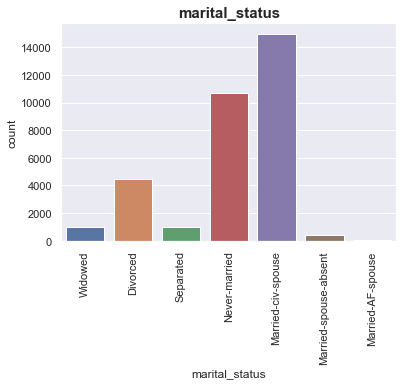

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


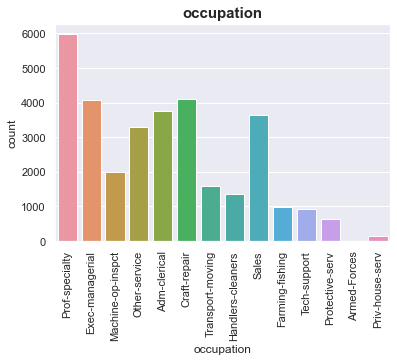

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


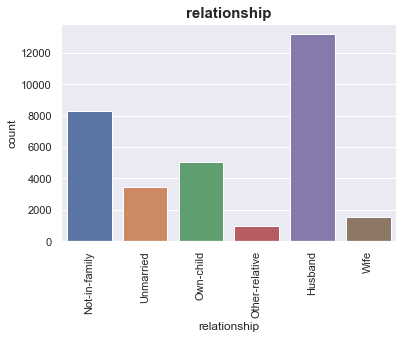

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


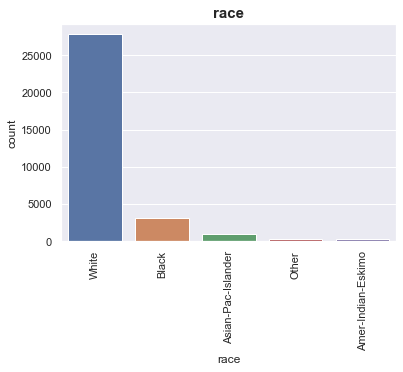

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


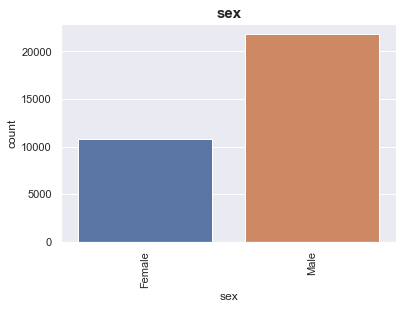

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


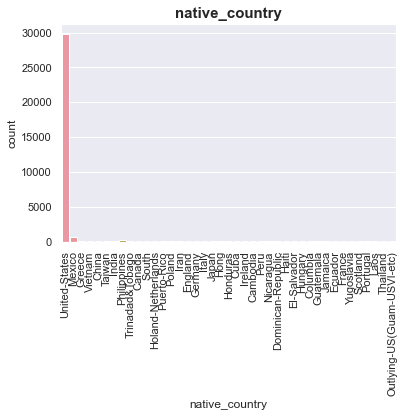

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


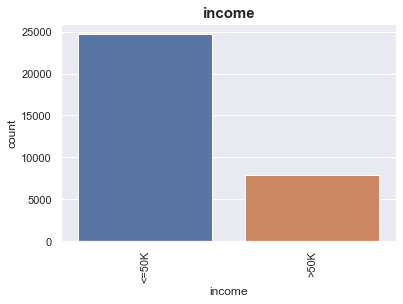

In [20]:
for feature in categorical_feature:
    sns.countplot(data[feature])
    plt.xticks(rotation=90)
    plt.title(feature, fontsize=15, fontweight='bold')
    plt.show()

# observation

1. most people are working for private companies
2. majority of the people's education level is HS-grad followede by some college and bachelors degree
3. married-civ-spouce has the highest among other categories
4. relationship - husband
5. mostly white people 
6. There are more male than female
7. the people's native country is united states
8. majority of the people earning more than 50k dollars

here the target variable is greatly imbalanced, needs fixing otherwise the model is going to be biased

# Multivariate analysis

In [21]:
#see the corelation between the continuous features
round(data[continuous_feature].corr(), 2)

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital_gain,0.08,0.00,1.00,-0.03,0.08
capital_loss,0.06,-0.01,-0.03,1.00,0.05
hours_per_week,0.07,-0.02,0.08,0.05,1.00


<AxesSubplot:title={'center':'Heatmap of the continuous features'}>

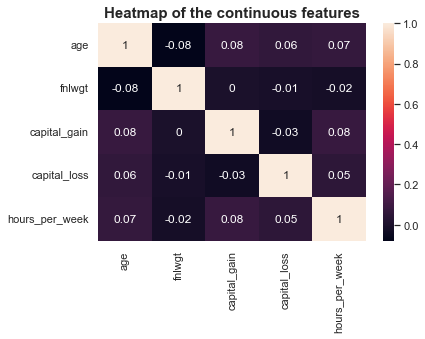

In [22]:
#visualization of corelation between the variables
plt.title('Heatmap of the continuous features', fontsize=15, fontweight='bold')
sns.heatmap(round(data[continuous_feature].corr(), 2), annot=True)

# observation

There are not much corelation between the continuous features.

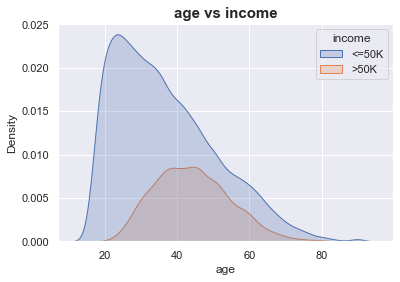

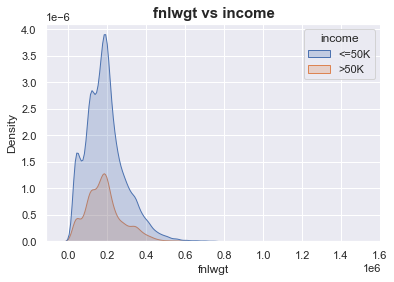

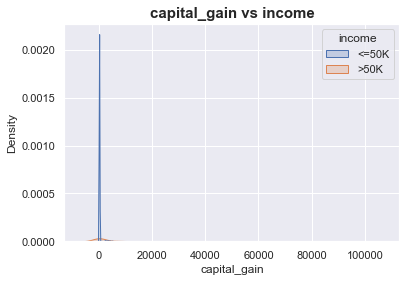

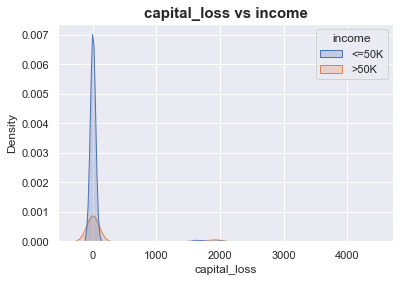

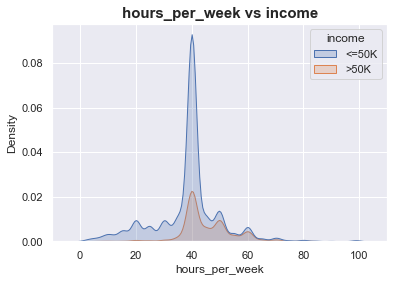

In [23]:
#distribution of continuous variables vs target feature
for feature in continuous_feature:
    sns.kdeplot(data[feature], hue=data['income'], shade=True)
    plt.title('{} vs income'.format(feature), fontsize=15, fontweight='bold')
    plt.show()

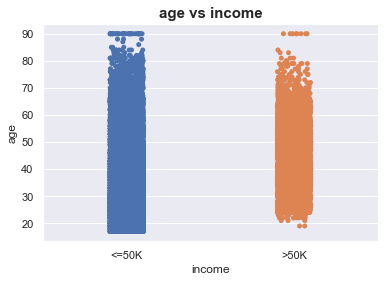

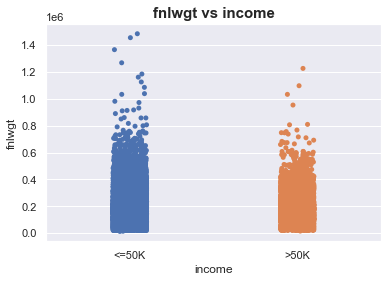

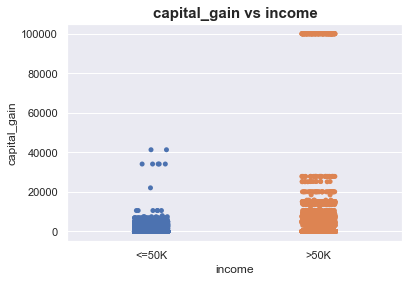

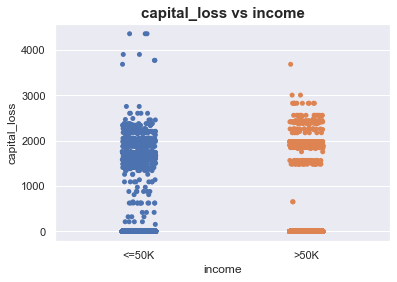

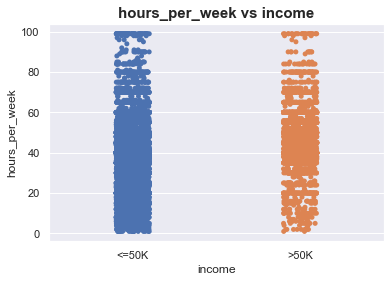

In [24]:
#strip plot of continuous features
for feature in continuous_feature:
    sns.stripplot(x=data['income'], y=data[feature])
    plt.title('{} vs income'.format(feature), fontsize=15, fontweight='bold')
    plt.show()

# observation

1. Capital gain comes more from those who are getting more than 50k renumaration
2. Capital loss comes mostly from those who are getting less than 50k salary
3. Those who are getting less than 50k are working more hours in a week than those who are getting
more than 50k

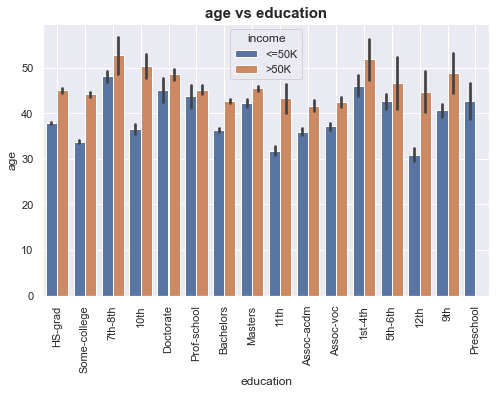

In [25]:
#education vs age
plt.figure(figsize=(8,5))
plt.title('age vs education', fontsize=15, fontweight='bold')
sns.barplot(x=data['education'], y=data['age'], hue=data['income'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# observation

All the category of education feature are getting over 50k salary when they are much more
experienced.

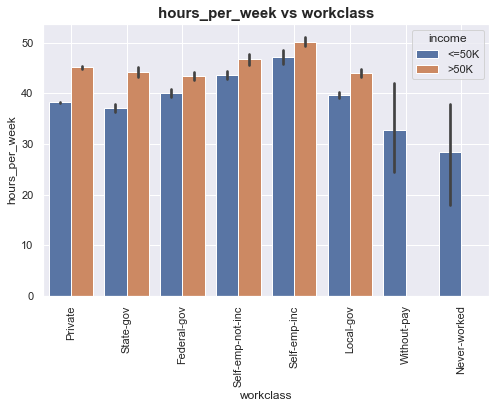

In [26]:
#comparing workclass with age
plt.figure(figsize=(8,5))
plt.title('hours_per_week vs workclass', fontsize=15, fontweight='bold')
sns.barplot(y=data['hours_per_week'], x=data['workclass'], hue=data['income'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# observation

1. more working hours gives more salary
2. in self employed inc and self employed not inc category even people work more than the average of 40 hours still getting less than 50k

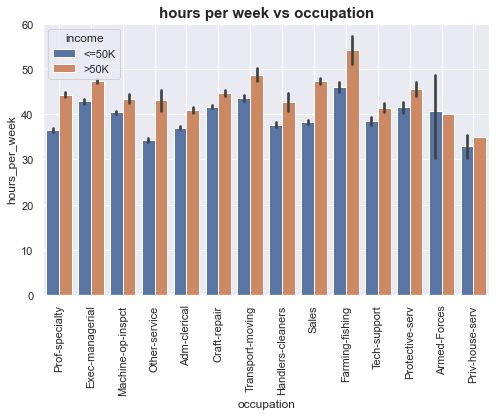

In [27]:
#comparison between hours per week and occupation
plt.figure(figsize=(8,5))
plt.title('hours per week vs occupation', fontsize=15, fontweight='bold')
sns.barplot(y=data['hours_per_week'], x=data['occupation'], hue=data['income'])
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# observation

in the armed force category even if the work less but they are making more than 50k 

# bi-variate analysis

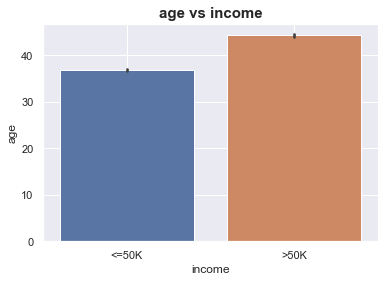

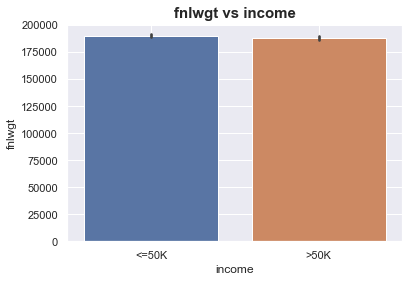

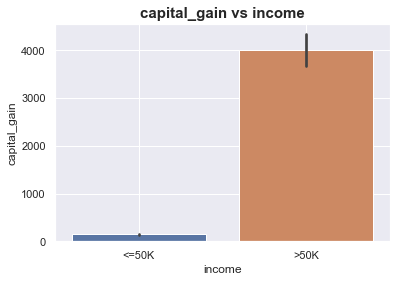

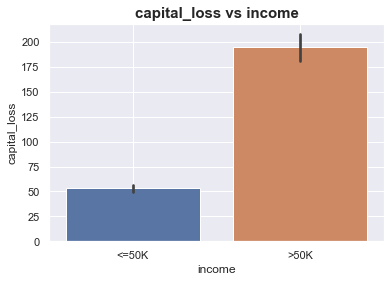

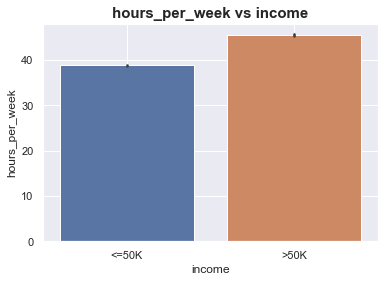

In [28]:
for feature in continuous_feature:
    sns.barplot(y=data[feature], x=data['income'])
    plt.title('{} vs income'.format(feature), fontsize=15, fontweight='bold')
    plt.grid(True)
    plt.show()

# observation

1. when the age increases the income also increases
2. when the number of working hours increases with increase in income
3. capital gain and capital loss experiencing high income

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


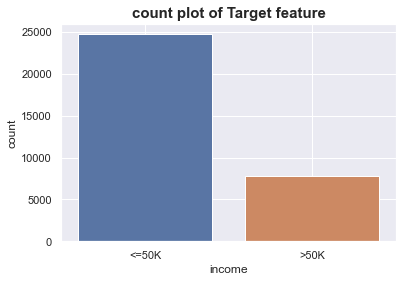

In [29]:
#count plot of target feature
sns.countplot(data['income'])
plt.title('count plot of Target feature', fontsize=15, fontweight='bold')
plt.gray()
plt.grid(True)
plt.show()

# observation

Count plot shows the clear imbalance of data, the people who earn less than 50k are more.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


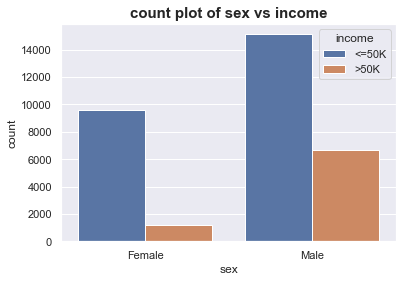

In [30]:
#countplot of sex
sns.countplot(data['sex'], hue=data['income'])
plt.title('count plot of sex vs income', fontsize=15, fontweight='bold')
plt.show()

# observation

more number of men are earning more than 50k than their female counterparts.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


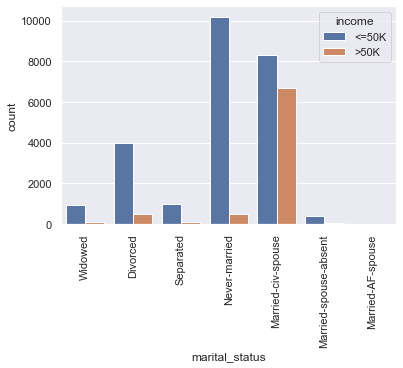

In [31]:
#countplot of marital status vs income
sns.countplot(data['marital_status'], hue=data['income'])
plt.xticks(rotation=90)
plt.show()

In [32]:
#fixing the outliers present in the feature 'fnlwgt'
upper_quantile = data['fnlwgt'].quantile(0.75)
lower_quantile = data['fnlwgt'].quantile(0.25)
inter_quartile = upper_quantile - lower_quantile
upper_boundary = upper_quantile + (1.5*inter_quartile)
lower_boundary = lower_quantile - (1.5*inter_quartile)
data.loc[data['fnlwgt']>upper_boundary, 'fnlwgt'] = upper_boundary
data.loc[data['fnlwgt']<lower_boundary, 'fnlwgt'] = lower_boundary

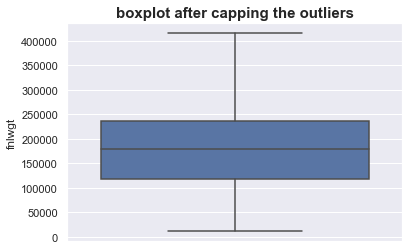

In [33]:
#checking the outlier after capping it with upper and lower boundary values
sns.boxplot(y=data['fnlwgt'])
plt.title('boxplot after capping the outliers', fontsize=15, fontweight='bold')
plt.show()

# Encoding

In [34]:
#importing encoder libraries
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
#splitting the data into x and y
x = data.drop('income', axis=1)
x

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [36]:
#creating y variable
y = data.income

In [37]:
#shape of x
x.shape

(32561, 14)

In [38]:
#shape of y variable
y.shape

(32561,)

In [39]:
#creating tranform object for feature transformation
transform = ColumnTransformer(transformers=[('tnf1', OrdinalEncoder(), ['education']),
                               ('tnf2', OneHotEncoder(sparse=False, drop='first'), ['workclass','marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country'])], remainder='passthrough')

In [40]:
#importing label encoder for feature transformation
from sklearn.preprocessing import LabelEncoder

In [41]:
#object for label encoder
label = LabelEncoder()

In [42]:
#trnsforming y variable
y = label.fit_transform(y)

In [43]:
#converting array into datatype
y = pd.DataFrame(y)

In [44]:
#transformed and converted into dataframe
x = pd.DataFrame(transform.fit_transform(x))

# Scaling the independent and dependent features

In [45]:
#importing Standard scalar
from sklearn.preprocessing import StandardScaler

In [46]:
#creating object for standard scalar
std = StandardScaler()

In [47]:
#Rescaling the independent features 
x = pd.DataFrame(std.fit_transform(x))

In [48]:
x

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.181332,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,3.769612,-1.153981,-0.420060,-0.14592,10.593507,-0.035429
1,0.181332,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,3.183112,-0.567225,-0.420060,-0.14592,10.593507,-1.817204
2,1.214869,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,2.010110,-0.008074,-0.031360,-0.14592,10.593507,-0.035429
3,-1.368974,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,1.130359,-0.488500,-2.363558,-0.14592,9.461864,-0.035429
4,1.214869,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,0.177296,0.818201,-0.031360,-0.14592,9.461864,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.214869,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,-1.215643,1.296387,-0.031360,-0.14592,-0.216660,-0.035429
32557,-0.852205,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,1.083611,...,-0.024163,0.307208,-0.045408,-0.022173,-0.849080,0.740821,0.746039,-0.14592,-0.216660,-0.197409
32558,0.181332,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,1.083611,...,-0.024163,0.307208,-0.045408,-0.022173,0.103983,-0.341172,-0.420060,-0.14592,-0.216660,-0.035429
32559,0.181332,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074,-0.026587,-0.922841,...,-0.024163,0.307208,-0.045408,-0.022173,1.423610,-0.367074,-0.420060,-0.14592,-0.216660,-0.035429


In [49]:
label.classes_

array(['<=50K', '>50K'], dtype=object)

In [50]:
y.value_counts()

0    24720
1     7841
dtype: int64

# Train and Test split

In [51]:
#importing train and test split
from sklearn.model_selection import train_test_split

In [52]:
#train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [53]:
#shape of train and test dataset
print('shape of x_train:', x_train.shape, '\nshape of x_test:', x_test.shape, '\nshape of y_train:', y_train.shape,
     '\nshape of y_test:', y_test.shape)

shape of x_train: (26048, 83) 
shape of x_test: (6513, 83) 
shape of y_train: (26048, 1) 
shape of y_test: (6513, 1)


# Model Building

In [54]:
#importing all the libraries for model building
from sklearn.svm import SVC

In [55]:
#creating an object for svc
svc = SVC()

In [56]:
#fitting the model by passing trained datasets
svc.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [57]:
#predicting the values for model evaluation
y_pred = svc.predict(x_test)

# Model Evaluation

In [58]:
#importing libraries required for model evaluation
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [59]:
#accuarcy score of the model
accuracy_score_svc = round(accuracy_score(y_test, y_pred), 2)

In [60]:
#confusion matrix
confuse = confusion_matrix(y_test, y_pred)
confuse

array([[4619,  308],
       [ 729,  857]], dtype=int64)

In [61]:
#true positive, true negative, false positive, false negative
true_positive = confuse[0][0]
false_positive = confuse[0][1]
false_negative = confuse[1][0]
true_negative = confuse [1][1]

In [62]:
print (true_positive, true_negative, false_positive, false_negative)

4619 857 308 729


In [63]:
#classification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4927
           1       0.74      0.54      0.62      1586

    accuracy                           0.84      6513
   macro avg       0.80      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [64]:
#importing libraries
from sklearn.metrics import recall_score, roc_curve, plot_roc_curve, plot_confusion_matrix, f1_score, roc_auc_score

In [65]:
#recall score
recall_score_svc = round(recall_score(y_test, y_pred, pos_label=0),2)

In [66]:
#f1 score
f1_score_svc = round(f1_score(y_test, y_pred, pos_label=0), 2)

In [67]:
#roc auc score
roc_auc_score_svc = round(roc_auc_score(y_test, y_pred), 2)

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


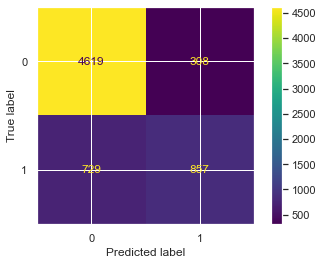

In [68]:
#plotting confusion matrix
plot_confusion_matrix(svc, x_test, y_test)

In [69]:
#drawing roc curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive Rate')

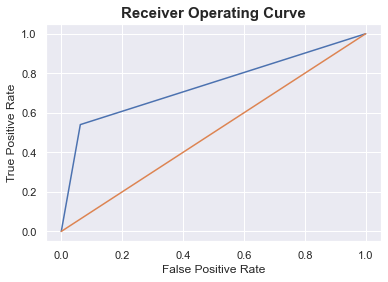

In [70]:
#plotting Receiver Operating Curve
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Report

In [71]:
#accuracy metrics of this model

print('accuracy_score:', accuracy_score_svc)
print('roc_auc_score:', roc_auc_score_svc)
print('recall_score:', recall_score_svc)
print('f1_score:', f1_score_svc)

accuracy_score: 0.84
roc_auc_score: 0.74
recall_score: 0.94
f1_score: 0.9


# Logistic Regression model

In [72]:
#importing logistic regression library from sklearn
from sklearn.linear_model import LogisticRegression

In [73]:
#creating an object for logistic regression
logi = LogisticRegression()

In [74]:
#fiiting the model on training dataset
logi.fit(x_train, y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [75]:
#predicting the output 
y_pred_logi = logi.predict(x_test)

In [76]:
#coefficient of the model
logi.coef_

array([[ 0.03926747, -0.1682614 , -0.05896337, -0.24664096, -0.0659831 ,
        -0.27237452, -0.14323904, -0.1482633 ,  0.08131995,  1.01975332,
        -0.00803441, -0.2338006 , -0.03376885,  0.00550548, -0.01977827,
         0.02621006,  0.25179612, -0.17055648, -0.14844861, -0.05727407,
        -0.27813953, -0.2683312 ,  0.10954753,  0.06058819,  0.10096769,
         0.10167349, -0.02153634,  0.17454479, -0.06401655, -0.25342202,
         0.1084148 ,  0.29000068,  0.07132425,  0.1011742 ,  0.01610538,
         0.17113296,  0.39787901, -0.05779392, -0.07610596, -0.11820568,
        -0.04030219, -0.14029785, -0.04012726, -0.08998975, -0.04269629,
        -0.02218241, -0.04479496, -0.06581423, -0.04977804, -0.04286665,
        -0.03193459, -0.04071233, -0.02848262, -0.0238804 , -0.07045426,
        -0.034122  , -0.03109108, -0.00639728, -0.06810045, -0.03744379,
        -0.02265   , -0.23338041, -0.08072104, -0.15168579, -0.08368795,
        -0.05010277, -0.04578967, -0.04962515, -0.1

In [77]:
#intercept of the model
logi.intercept_

array([-2.08614194])

# Model Evaluation

In [78]:
#accuracy score of logistic model
accuracy_score_logi = round(accuracy_score(y_test, y_pred_logi), 2)
accuracy_score_logi

0.85

In [79]:
#recall score of logistic regression model
recall_score_logi = round(recall_score(y_test, y_pred_logi, pos_label=0), 2)

In [80]:
#f1 score of logistic model
f1_score_logi = round(f1_score(y_test, y_pred_logi, pos_label=0), 2)

In [81]:
#precision score of logistic model
precision_score_logi = round(precision_score(y_test, y_pred_logi, pos_label=0), 2)

In [82]:
#confusion matrix of this model
confuse_logi = confusion_matrix(y_test, y_pred_logi)
confuse_logi

array([[4592,  335],
       [ 662,  924]], dtype=int64)

In [83]:
#true positive, true negative, false positive and false negative
true_positive_logi = confuse_logi[0][0]
false_positive_logi = confuse_logi[0][1]
false_negative_logi = confuse_logi[1][0]
true_negative_logi = confuse_logi[1][1]

In [84]:
#classification report of the model
print(classification_report(y_test, y_pred_logi))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4927
           1       0.73      0.58      0.65      1586

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [85]:
#roc auc score
roc_auc_score_logi = round(roc_auc_score(y_test, y_pred_logi), 2)

In [86]:
#roc curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_logi)

Text(0, 0.5, 'True Positive Rate')

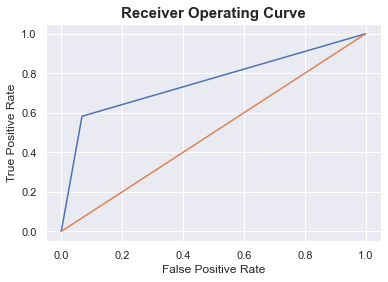

In [87]:
#drawing roc curve 
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Report 

In [88]:
print('accuracy_score:', accuracy_score_logi, '\nprecision_score:', precision_score_logi, 
     '\nrecall_score:', recall_score_logi, '\nf1_score:', f1_score_logi, '\nroc_auc_score:', roc_auc_score_logi)


accuracy_score: 0.85 
precision_score: 0.87 
recall_score: 0.93 
f1_score: 0.9 
roc_auc_score: 0.76


# hypertuning of svc model

In [89]:
#importing grid search for hypertuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [90]:
#parameter and kfold crossvalidation for grid search
parameter = {'kernel' : ['linear'],
             'gamma' : [ 'auto'],
             'C' : [1,10]
             }

kfold = KFold(2, shuffle=True, random_state=30)

In [91]:
#passing the parameters for grid search
grid = GridSearchCV(estimator=SVC(), param_grid=parameter, cv=kfold, verbose=True)

In [92]:
#fitting model on training dataset
grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GridSearchCV(cv=KFold(n_splits=2, random_state=30, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ['auto'], 'kernel': ['linear']},
             verbose=True)

In [93]:
#best parameter of the model
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

In [94]:
#predicted model after hypertuning
y_pred_hyper = grid.predict(x_test)

# Model Evaluation

In [95]:
#accuracy score after hypertuning
accuracy_score_hyper = round(accuracy_score(y_test, y_pred_hyper), 2)
accuracy_score_hyper

0.85

In [96]:
#precision score
precision_score_hyper = round(precision_score(y_test, y_pred_hyper, pos_label=0), 2)
precision_score_hyper

0.87

In [97]:
#recall score
recall_score_hyper = round(recall_score(y_test, y_pred_hyper, pos_label=0), 2)
recall_score_hyper

0.93

In [98]:
#f1 score
f1_score_hyper = round(f1_score(y_test, y_pred_hyper, pos_label=0), 2)
f1_score_hyper

0.9

In [99]:
#roc auc score
roc_auc_hyper = round(roc_auc_score(y_test, y_pred_hyper), 2)
roc_auc_hyper

0.76

In [100]:
#classification matrix
print(classification_report(y_test, y_pred_hyper))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4927
           1       0.74      0.58      0.65      1586

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [101]:
#confusion matrix
confuse_hyper = confusion_matrix(y_test, y_pred_hyper)
confuse_hyper

array([[4606,  321],
       [ 666,  920]], dtype=int64)

In [102]:
#true positive, true negative, false positive and false negative
true_positive_hyper = confuse_hyper[0][0]
false_positive_hyper = confuse_hyper[0][1]
false_negative_hyper = confuse_hyper[1][0]
true_negative_hyper = confuse_hyper[1][1]

In [103]:
#roc auc score
roc_auc_hyper = round(roc_auc_score(y_test, y_pred_hyper), 2)
roc_auc_hyper

0.76

In [104]:
#roc curve(fpr, tpr, threshold)
fpr, tpr, threshold = roc_curve(y_test, y_pred_hyper)

Text(0, 0.5, 'True Positive Rate')

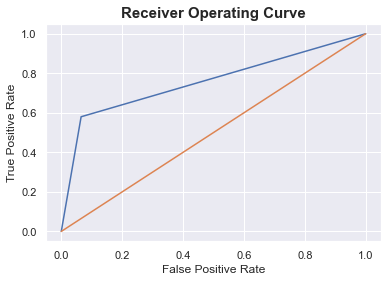

In [105]:
#receiver operating curve
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Report

In [106]:
print('accuracy_score:', accuracy_score_hyper, '\nprecision_score:', precision_score_hyper, 
     '\nrecall_score:', recall_score_hyper, '\nf1_score:', f1_score_hyper, '\nroc_auc_score:', roc_auc_hyper)


accuracy_score: 0.85 
precision_score: 0.87 
recall_score: 0.93 
f1_score: 0.9 
roc_auc_score: 0.76


# balancing the training dataset only using Random Under Sampler 

In [107]:
#importing the libraries
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [108]:
#creating an object for Random under sampler 
ran = RandomUnderSampler()

In [109]:
#resampling training dataset
x_train_ran, y_train_ran = ran.fit_resample(x_train, y_train)

In [110]:
#after resampling
y_train_ran.value_counts()

0    6255
1    6255
dtype: int64

# Balanced SVC Model by passing resampled datasets

In [111]:
#fitting the model by passing resmapled sets
svc.fit(x_train_ran, y_train_ran)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [112]:
#predicting the model after resampling
y_pred_bal = svc.predict(x_test)
y_pred_bal

array([0, 0, 1, ..., 0, 0, 0])

# Model Evaluation

In [113]:
#accuracy score 
acc_score = round(accuracy_score(y_test, y_pred_bal), 2)
acc_score

0.8

In [114]:
#precision score
pre_score = round(precision_score(y_test, y_pred_bal, pos_label=0), 2)
pre_score

0.94

In [115]:
#f1 score
f11_score = round(f1_score(y_test, y_pred_bal, pos_label=0), 2)
f11_score

0.85

In [116]:
#roc auc score
ro_au_score = round(roc_auc_score(y_test, y_pred_bal), 2)
ro_au_score

0.82

In [117]:
#recall score
recal_score = round(recall_score(y_test, y_pred_bal), 2)
recal_score

0.85

In [118]:
#confusion matrix
confusion_matrix(y_test, y_pred_bal)

array([[3857, 1070],
       [ 242, 1344]], dtype=int64)

In [119]:
#classification report
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      4927
           1       0.56      0.85      0.67      1586

    accuracy                           0.80      6513
   macro avg       0.75      0.82      0.76      6513
weighted avg       0.85      0.80      0.81      6513



In [120]:
#fpr, tpr and threshold
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_bal)

Text(0, 0.5, 'True Positive Rate')

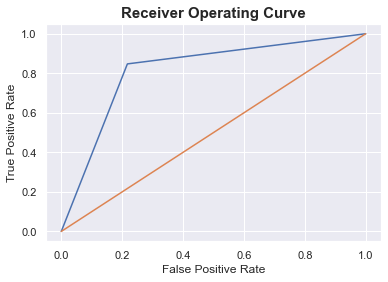

In [121]:
#receiver operating curve
plt.plot(fpr1, tpr1)
plt.plot([0,1],[0,1])
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Report

In [122]:
#printing the scores of the model
print('accuracy_score:', acc_score, '\nprecision_score:', pre_score, 
     '\nrecall_score:', recal_score, '\nf1_score:', f11_score, '\nroc_auc_score:', ro_au_score)

accuracy_score: 0.8 
precision_score: 0.94 
recall_score: 0.85 
f1_score: 0.85 
roc_auc_score: 0.82


# Balanced Logistic Model by passing resampled datasets

In [123]:
#fitting the model by passing resampled datsets
logi.fit(x_train_ran, y_train_ran)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [124]:
#predicting the model
y_pred_balogi = logi.predict(x_test)
y_pred_balogi

array([0, 0, 1, ..., 0, 0, 0])

# Model Evaluation

In [125]:
#accuracy score
acc_score_logi = round(accuracy_score(y_test, y_pred_balogi),2)
acc_score_logi

0.81

In [126]:
#precision score
pre_score_logi = round(precision_score(y_test, y_pred_balogi), 2)
pre_score_logi

0.57

In [127]:
#recall score
recal_score_logi = round(recall_score(y_test, y_pred_balogi), 2)
recal_score_logi

0.84

In [128]:
#f1 score
f11_score_logi = round(f1_score(y_test, y_pred_balogi, pos_label=0), 2)
f11_score_logi

0.86

In [129]:
#confusion matrix
confusion_matrix(y_test, y_pred_balogi)

array([[3940,  987],
       [ 253, 1333]], dtype=int64)

In [130]:
#classification report
print(classification_report(y_test, y_pred_balogi))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4927
           1       0.57      0.84      0.68      1586

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



In [131]:
#roc curve
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_balogi)

Text(0, 0.5, 'True Positive Rate')

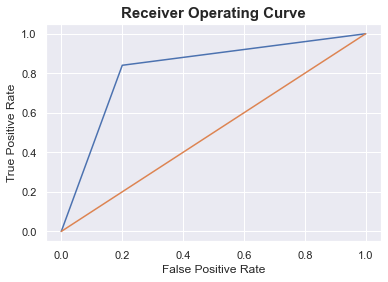

In [132]:
#Receiver Operating Curve
plt.plot(fpr2, tpr2)
plt.plot([0,1],[0,1])
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Hypertuning SVC model on resampled data

In [133]:
#parameter and kfold crossvalidation for grid search
parameter = {'kernel' : ['linear'],
             'gamma' : [ 'auto'],
             'C' : [1,10]
             }

kfold = KFold(2, shuffle=True, random_state=30)

In [134]:
#passing the parameters for grid search
grid1 = GridSearchCV(estimator=SVC(), param_grid=parameter, cv=kfold, verbose=True)

In [135]:
#fitting the model
grid1.fit(x_train_ran, y_train_ran)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

GridSearchCV(cv=KFold(n_splits=2, random_state=30, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': ['auto'], 'kernel': ['linear']},
             verbose=True)

In [136]:
grid1.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [137]:
#predicting the model
predi = grid1.predict(x_test)
predi

array([0, 1, 1, ..., 0, 0, 0])

# Model Evaluation

In [138]:
#accuracy score
round(accuracy_score(y_test, predi), 2)

0.79

In [139]:
#precison score
round(precision_score(y_test, predi, pos_label=0), 2)

0.94

In [140]:
#recall score
round(recall_score(y_test, predi, pos_label=0), 2)

0.77

In [141]:
#f1 score
round(f1_score(y_test, predi, pos_label=0), 2)

0.85

In [142]:
#confusion matrix
confusion_matrix(y_test, predi)

array([[3805, 1122],
       [ 233, 1353]], dtype=int64)

In [143]:
#classification report 
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4927
           1       0.55      0.85      0.67      1586

    accuracy                           0.79      6513
   macro avg       0.74      0.81      0.76      6513
weighted avg       0.85      0.79      0.80      6513



In [144]:
#roc auc 
round(roc_auc_score(y_test, predi), 2)

0.81

In [145]:
#fpr, tpr, threshold
fpr3, tpr3, threshold3 = roc_curve(y_test, predi)

Text(0, 0.5, 'True Positive Rate')

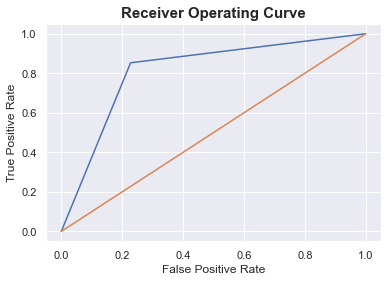

In [146]:
#receiver operating curve
plt.plot(fpr3, tpr3)
plt.plot([0,1],[0,1])
plt.title('Receiver Operating Curve', fontsize=15, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Here we can see that Support vector Classifier gives the highest accuracy of 85 per cent and F1 score of 77 per cent , making it the most apt algorithm to be used further in predicting data about whether a persons income is less than or greater that $50K.